#### Importing all the required libraries for this task

In [1]:
import pandas as pn
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import numpy as np
from scipy.stats.distributions import poisson

Reading the covid superset dataset

In [2]:
superset_long = pn.read_csv("../../../../data/stage_2/superset_long.csv")
superset_long

,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases
0,1001,AL,Autauga County,1,55869,1/22/2020,0,0
1,1003,AL,Baldwin County,1,223234,1/22/2020,0,0
2,1005,AL,Barbour County,1,24686,1/22/2020,0,0
3,1007,AL,Bibb County,1,22394,1/22/2020,0,0
4,1009,AL,Blount County,1,57826,1/22/2020,0,0
...,...,...,...,...,...,...,...,...
1800361,56037,WY,Sweetwater County,56,42343,8/16/2021,45,5127
1800362,56039,WY,Teton County,56,23464,8/16/2021,11,4068
1800363,56041,WY,Uinta County,56,20226,8/16/2021,14,2593
1800364,56043,WY,Washakie County,56,7805,8/16/2021,26,967


Taking Indiana State dataset. Calculating daily new cases and new deaths per day. Since there are lot of rows with value of 0 it impacts the distribution. It avaoid a bit of that all the rows with new cases per day equals to 0. Chaning the date column to date format.

In [3]:
Indiana_df = superset_long[superset_long['StateFIPS'] == 18]
Indiana_df['New_cases_per_day'] = round((Indiana_df.groupby('countyFIPS').Cases.diff()/Indiana_df['population'])*100000,2)
Indiana_df['New_deaths_per_day'] = round((Indiana_df.groupby('countyFIPS').Deaths.diff()/Indiana_df['population'])*100000,2)
Indiana_df = Indiana_df.dropna()
Indiana_df[Indiana_df['New_cases_per_day']<0]=0
Indiana_df = Indiana_df[Indiana_df['New_cases_per_day'] != 0]
Indiana_df['Date'] = pn.to_datetime(Indiana_df['Date'])
Indiana_df

<ipython-input-3-e7d29b0f36c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indiana_df['New_cases_per_day'] = round((Indiana_df.groupby('countyFIPS').Cases.diff()/Indiana_df['population'])*100000,2)
<ipython-input-3-e7d29b0f36c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indiana_df['New_deaths_per_day'] = round((Indiana_df.groupby('countyFIPS').Deaths.diff()/Indiana_df['population'])*100000,2)


,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
138993,18097,IN,Marion County,18,964582,2020-03-06,0,1,0.10,0.00
145260,18063,IN,Hendricks County,18,170311,2020-03-08,0,1,0.59,0.00
148371,18001,IN,Adams County,18,35777,2020-03-09,0,1,2.80,0.00
148376,18011,IN,Boone County,18,67843,2020-03-09,0,1,1.47,0.00
148402,18063,IN,Hendricks County,18,170311,2020-03-09,0,2,0.59,0.00
...,...,...,...,...,...,...,...,...,...,...
1798008,18175,IN,Washington County,18,28036,2021-08-16,40,2682,103.44,3.57
1798009,18177,IN,Wayne County,18,65884,2021-08-16,206,7869,94.10,0.00
1798010,18179,IN,Wells County,18,28296,2021-08-16,83,3218,141.36,0.00
1798011,18181,IN,White County,18,24102,2021-08-16,55,3488,49.79,0.00


Aggregating the dataset based on each date to find the total cases of Indiana state on that day.

In [4]:
Indiana_total = Indiana_df.groupby('Date').sum().reset_index()
Indiana_total

,Date,countyFIPS,StateFIPS,population,Deaths,Cases,New_cases_per_day,New_deaths_per_day
0,2020-03-06,18097,18,964582,0,1,0.10,0.00
1,2020-03-08,18063,18,170311,0,1,0.59,0.00
2,2020-03-09,72188,72,321675,0,5,6.95,0.00
3,2020-03-10,36148,36,240711,0,4,3.11,0.00
4,2020-03-12,36238,36,1236408,0,3,0.47,0.00
...,...,...,...,...,...,...,...,...
494,2021-08-10,1628432,1620,6712894,14057,789891,3642.93,44.66
495,2021-08-11,1628430,1620,6709884,14058,792063,4093.99,41.79
496,2021-08-12,1664464,1656,6732219,14116,797712,5076.65,8.00
497,2021-08-13,1574031,1566,6664799,13938,793070,4366.11,16.28


#### Plot of daily new cases in Indiana. The plot is skewed to left and has long tail to the right.

<AxesSubplot:>

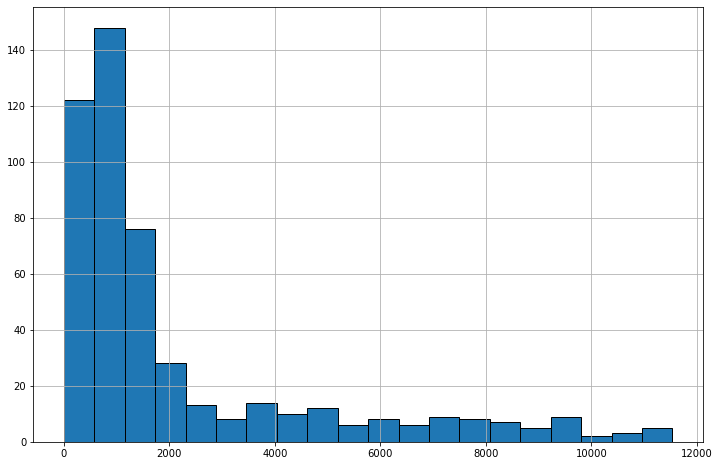

In [5]:
Indiana_total.New_cases_per_day.hist(bins=20, ec='black', figsize=(12,8))

In [6]:
pn.crosstab(index="counts", columns= Indiana_total['New_cases_per_day'])

New_cases_per_day,0.10,0.47,0.59,1.31,3.11,5.15,6.95,13.77,20.29,35.70,...,9844.79,10316.67,10516.10,10654.61,10936.36,10971.23,11281.42,11413.13,11426.58,11535.78
row_0,,,,,,,,,,,,,,,,,,,,,
counts,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Statistical Data of New Cases per day of Indiana State. 

In [7]:
average_cases = Indiana_total['New_cases_per_day'].mean()
print('Mean of new cases per day in Indiana',average_cases)
variance = Indiana_total['New_cases_per_day'].var()
print('Variance of new cases per day in Indiana',variance)
Skewness = stats.skew(Indiana_total['New_cases_per_day'])
print('Skewness of new cases per day in Indiana',Skewness)
Kurtosis = stats.kurtosis(Indiana_total['New_cases_per_day'])
print('Kurtosis of new cases per day in Indiana',Kurtosis)

Mean of new cases per day in Indiana 2193.8164328657313
Variance of new cases per day in Indiana 6888310.559725405
Skewness of new cases per day in Indiana 1.8194030797452723
Kurtosis of new cases per day in Indiana 2.3478978304014113


Probability mass function plot.

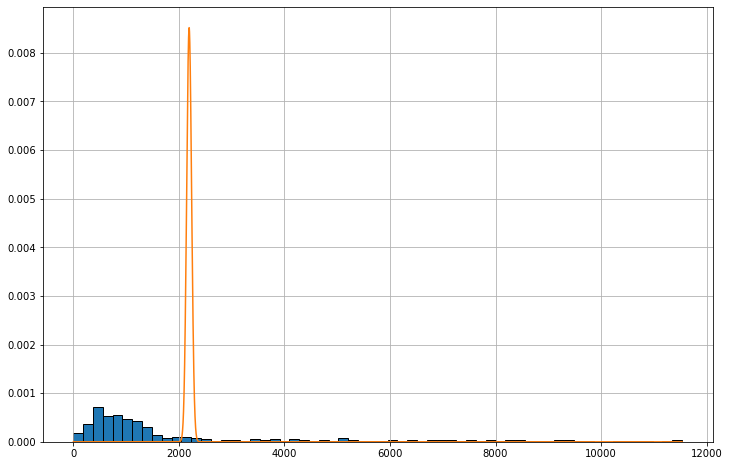

In [8]:
max_cases = Indiana_total['New_cases_per_day'].max()
min_cases = Indiana_total['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_cases, max_cases)


Indiana_total.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

### 1. California - Heighest Populated State

Taking dataset of california state and calculating new cases and new deaths per day. These values are normalized to 100000.

In [9]:
California_df = superset_long[superset_long['StateFIPS'] == 6]
California_df['New_cases_per_day'] = round((California_df.groupby('countyFIPS').Cases.diff()/California_df['population'])*100000,2)
California_df['New_deaths_per_day'] = round((California_df.groupby('countyFIPS').Deaths.diff()/California_df['population'])*100000,2)
California_df = California_df.dropna()
California_df[California_df['New_cases_per_day']<0]=0
California_df[California_df['New_deaths_per_day']<0]=0
California_df = California_df[California_df['New_cases_per_day'] != 0]
California_df['Date'] = pn.to_datetime(California_df['Date'])
California_total = California_df.groupby('Date').sum().reset_index()
California_df

<ipython-input-9-e02ae30af75a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  California_df['New_cases_per_day'] = round((California_df.groupby('countyFIPS').Cases.diff()/California_df['population'])*100000,2)
<ipython-input-9-e02ae30af75a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  California_df['New_deaths_per_day'] = round((California_df.groupby('countyFIPS').Deaths.diff()/California_df['population'])*100000,2)


,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
12772,6037,CA,Los Angeles County,6,10039107,2020-01-26,0,1,0.01,0.00
12783,6059,CA,Orange County,6,3175692,2020-01-26,0,1,0.03,0.00
15938,6085,CA,Santa Clara County,6,1927852,2020-01-27,0,1,0.05,0.00
22222,6085,CA,Santa Clara County,6,1927852,2020-01-29,0,2,0.05,0.00
37924,6069,CA,San Benito County,6,62808,2020-02-03,0,2,3.18,0.00
...,...,...,...,...,...,...,...,...,...,...
1797463,6107,CA,Tulare County,6,466195,2021-08-16,856,52046,88.80,0.00
1797464,6109,CA,Tuolumne County,6,54478,2021-08-16,59,4934,163.37,0.00
1797465,6111,CA,Ventura County,6,846006,2021-08-16,1040,86793,81.68,0.00
1797466,6113,CA,Yolo County,6,220500,2021-08-16,225,15873,84.81,0.45


Statistical values of California states for new cases per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new cases per day in California 984.2686213592232
Variance of new cases per day in California 2082453.0860313643
Skewness of new cases per day in California 3.472010200439212
Kurtosis of new cases per day in California 20.387894782985647


<AxesSubplot:>

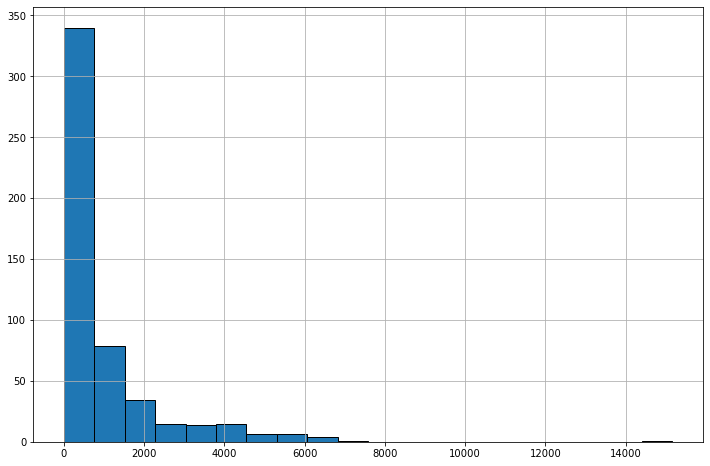

In [10]:

average_cases = California_total['New_cases_per_day'].mean()
print('Mean of new cases per day in California',average_cases)
variance = California_total['New_cases_per_day'].var()
print('Variance of new cases per day in California',variance)
Skewness = stats.skew(California_total['New_cases_per_day'])
print('Skewness of new cases per day in California',Skewness)
Kurtosis = stats.kurtosis(California_total['New_cases_per_day'])
print('Kurtosis of new cases per day in California',Kurtosis)

California_total.New_cases_per_day.hist(bins=20, ec='black', figsize=(12,8))

Plotting Probability Mass Function to the number of new cases per day on california state.

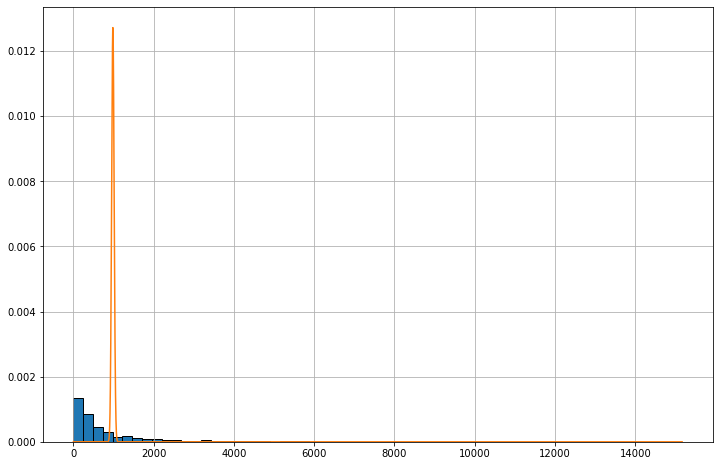

In [11]:
max_cases = California_total['New_cases_per_day'].max()
min_cases = California_total['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
California_poiss = np.array(new_list)
California_x_axis = np.arange(min_cases, max_cases)


California_total.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(California_x_axis, California_poiss)

Statistical values of California states for new deaths per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new deaths per day in California 984.2686213592232
Variance of new deaths per day in California 280.6091922843863
Skewness of new deaths per day in California 2.4489927717778355
Kurtosis of new deaths per day in California 7.861330840489126


<AxesSubplot:>

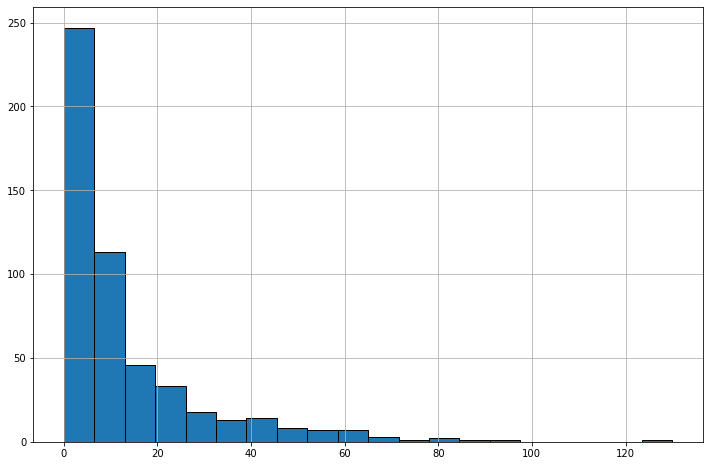

In [12]:
average_deaths = California_total['New_deaths_per_day'].mean()
print('Mean of new deaths per day in California',average_cases)
variance = California_total['New_deaths_per_day'].var()
print('Variance of new deaths per day in California',variance)
Skewness = stats.skew(California_total['New_deaths_per_day'])
print('Skewness of new deaths per day in California',Skewness)
Kurtosis = stats.kurtosis(California_total['New_deaths_per_day'])
print('Kurtosis of new deaths per day in California',Kurtosis)

California_total.New_deaths_per_day.hist(bins=20, ec='black', figsize=(12,8))

Plotting Probability Mass Function to the number of new deaths per day on california state.

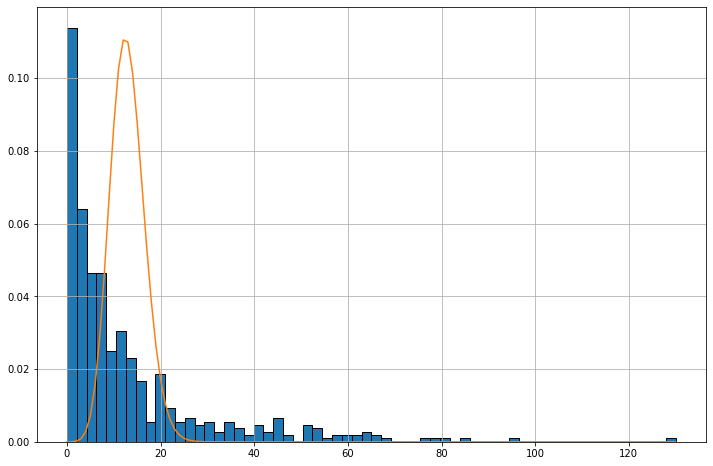

In [13]:
max_deaths = California_total['New_deaths_per_day'].max()
min_deaths = California_total['New_deaths_per_day'].min()
new_list =[] 
for i in range(int(min_deaths), int(max_deaths+1)):
        y =poisson.pmf(k=i, mu=average_deaths)
        new_list.append(y)
California_poiss = np.array(new_list)
California_x_axis = np.arange(min_deaths, max_deaths)


California_total.New_deaths_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(California_x_axis, California_poiss)

### 2. Wyoming is the least populated status in USA

Taking dataset of Wyoming state to check how the least populated state performes. Calculating new cases and new deaths per day. These values are normalized to 100000.

In [14]:
Wyoming_df = superset_long[superset_long['StateFIPS'] == 56]
Wyoming_df['New_cases_per_day'] = round((Wyoming_df.groupby('countyFIPS').Cases.diff()/Wyoming_df['population'])*100000,2)
Wyoming_df['New_deaths_per_day'] = round((Wyoming_df.groupby('countyFIPS').Deaths.diff()/Wyoming_df['population'])*100000,2)
Wyoming_df = Wyoming_df.dropna()
Wyoming_df[Wyoming_df['New_cases_per_day']<0]=0
Wyoming_df[Wyoming_df['New_deaths_per_day']<0]=0
Wyoming_df = Wyoming_df[Wyoming_df['New_cases_per_day'] != 0]
Wyoming_df['Date'] = pn.to_datetime(Wyoming_df['Date'])
Wyoming_total = Wyoming_df.groupby('Date').sum().reset_index()
Wyoming_df

<ipython-input-14-4ba20770fbaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wyoming_df['New_cases_per_day'] = round((Wyoming_df.groupby('countyFIPS').Cases.diff()/Wyoming_df['population'])*100000,2)
<ipython-input-14-4ba20770fbaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wyoming_df['New_deaths_per_day'] = round((Wyoming_df.groupby('countyFIPS').Deaths.diff()/Wyoming_df['population'])*100000,2)


,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
160235,56033,WY,Sheridan County,56,30485,2020-03-12,0,1,3.28,0.0
163367,56013,WY,Fremont County,56,39261,2020-03-13,0,1,2.55,0.0
166519,56033,WY,Sheridan County,56,30485,2020-03-14,0,2,3.28,0.0
172793,56013,WY,Fremont County,56,39261,2020-03-16,0,8,17.83,0.0
175939,56021,WY,Laramie County,56,99500,2020-03-17,0,2,2.01,0.0
...,...,...,...,...,...,...,...,...,...,...
1794076,56035,WY,Sublette County,56,9831,2021-08-14,9,881,10.17,0.0
1794077,56037,WY,Sweetwater County,56,42343,2021-08-14,45,5127,30.70,0.0
1794078,56039,WY,Teton County,56,23464,2021-08-14,11,4068,102.28,0.0
1794079,56041,WY,Uinta County,56,20226,2021-08-14,14,2593,168.10,0.0


Statistical values of Wyoming states for new cases per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new cases per day in Wyoming 583.2215659955258
Variance of new cases per day in Wyoming 751425.8047033721
Skewness of new cases per day in Wyoming 2.708128397711988
Kurtosis of new cases per day in Wyoming 7.840755271876748


<AxesSubplot:>

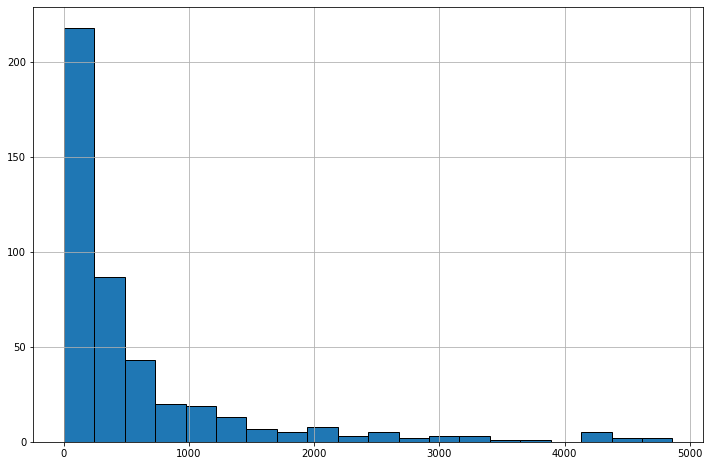

In [15]:
average_cases = Wyoming_total['New_cases_per_day'].mean()
print('Mean of new cases per day in Wyoming',average_cases)
variance = Wyoming_total['New_cases_per_day'].var()
print('Variance of new cases per day in Wyoming',variance)
Skewness = stats.skew(Wyoming_total['New_cases_per_day'])
print('Skewness of new cases per day in Wyoming',Skewness)
Kurtosis = stats.kurtosis(Wyoming_total['New_cases_per_day'])
print('Kurtosis of new cases per day in Wyoming',Kurtosis)

Wyoming_total.New_cases_per_day.hist(bins=20, ec='black', figsize=(12,8))

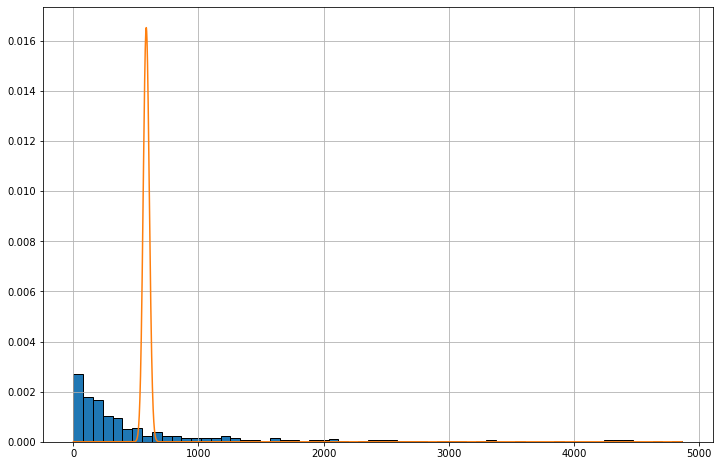

In [16]:
max_cases = Wyoming_total['New_cases_per_day'].max()
min_cases = Wyoming_total['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_cases, max_cases)


Wyoming_total.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

Statistical values of Wyoming states for new deaths per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new deaths per day in California 583.2215659955258
Variance of new deaths per day in California 471.8259319559434
Skewness of new deaths per day in California 5.139652904387424
Kurtosis of new deaths per day in California 31.662418446861096


<AxesSubplot:>

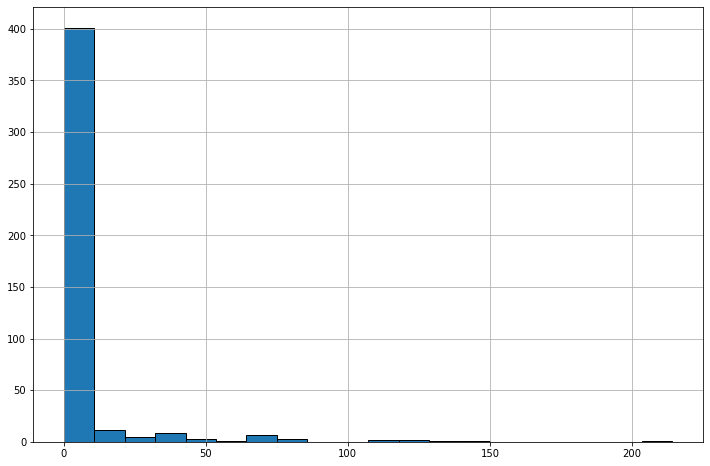

In [17]:
average_deaths = Wyoming_total['New_deaths_per_day'].mean()
print('Mean of new deaths per day in California',average_cases)
variance = Wyoming_total['New_deaths_per_day'].var()
print('Variance of new deaths per day in California',variance)
Skewness = stats.skew(Wyoming_total['New_deaths_per_day'])
print('Skewness of new deaths per day in California',Skewness)
Kurtosis = stats.kurtosis(Wyoming_total['New_deaths_per_day'])
print('Kurtosis of new deaths per day in California',Kurtosis)

Wyoming_total.New_deaths_per_day.hist(bins=20, ec='black', figsize=(12,8))

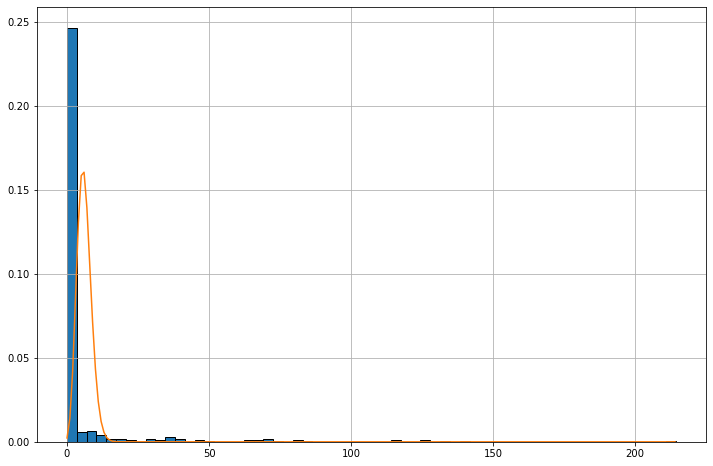

In [18]:
max_cases = Wyoming_total['New_deaths_per_day'].max()
min_cases = Wyoming_total['New_deaths_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_deaths)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_cases, max_cases)


Wyoming_total.New_deaths_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

### 3. North Carolina

Taking dataset of North Carolina state to check how our performes. Calculating new cases and new deaths per day. These values are normalized to 100000.

In [19]:
NC_df = superset_long[superset_long['StateFIPS'] == 37]
NC_df['New_cases_per_day'] = round((NC_df.groupby('countyFIPS').Cases.diff()/NC_df['population'])*100000,2)
NC_df['New_deaths_per_day'] = round((NC_df.groupby('countyFIPS').Deaths.diff()/NC_df['population'])*100000,2)
NC_df = NC_df.dropna()
NC_df[NC_df['New_cases_per_day']<0]=0
NC_df[NC_df['New_deaths_per_day']<0]=0
NC_df = NC_df[NC_df['New_cases_per_day'] != 0]
NC_df['Date'] = pn.to_datetime(NC_df['Date'])
NC_total = NC_df.groupby('Date').sum().reset_index()
NC_df

<ipython-input-19-1018fe4a532c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_df['New_cases_per_day'] = round((NC_df.groupby('countyFIPS').Cases.diff()/NC_df['population'])*100000,2)
<ipython-input-19-1018fe4a532c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_df['New_deaths_per_day'] = round((NC_df.groupby('countyFIPS').Deaths.diff()/NC_df['population'])*100000,2)


,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
130803,37183,NC,Wake County,37,1111761,2020-03-03,0,1,0.09,0.0
140156,37037,NC,Chatham County,37,74470,2020-03-06,0,1,1.34,0.0
149655,37183,NC,Wake County,37,1111761,2020-03-09,0,6,0.45,0.0
152797,37183,NC,Wake County,37,1111761,2020-03-10,0,7,0.09,0.0
155879,37063,NC,Durham County,37,321488,2020-03-11,0,1,0.31,0.0
...,...,...,...,...,...,...,...,...,...,...
1799209,37191,NC,Wayne County,37,123131,2021-08-16,247,12491,96.65,0.0
1799210,37193,NC,Wilkes County,37,68412,2021-08-16,119,7813,162.25,0.0
1799211,37195,NC,Wilson County,37,81801,2021-08-16,186,10502,91.69,0.0
1799212,37197,NC,Yadkin County,37,37667,2021-08-16,56,4541,156.64,0.0


Statistical values of Wyoming states for new cases per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new cases per day in NC 2375.414913043479
Variance of new cases per day in NC 8728352.21810915
Skewness of new cases per day in NC 5.148476567587348
Kurtosis of new cases per day in NC 45.087266754596264


<AxesSubplot:>

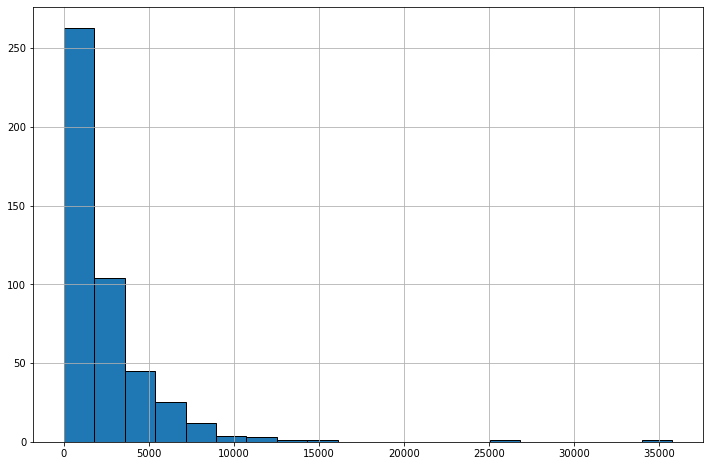

In [20]:
average_cases = NC_total['New_cases_per_day'].mean()
print('Mean of new cases per day in NC',average_cases)
variance = NC_total['New_cases_per_day'].var()
print('Variance of new cases per day in NC',variance)
Skewness = stats.skew(NC_total['New_cases_per_day'])
print('Skewness of new cases per day in NC',Skewness)
Kurtosis = stats.kurtosis(NC_total['New_cases_per_day'])
print('Kurtosis of new cases per day in NC',Kurtosis)

NC_total.New_cases_per_day.hist(bins=20, ec='black', figsize=(12,8))

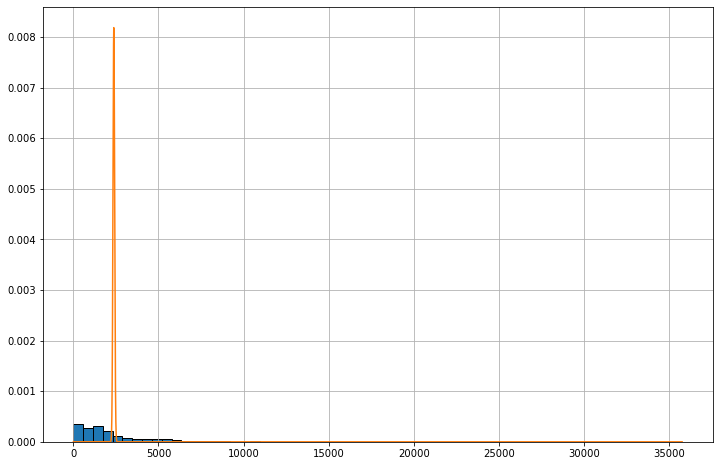

In [21]:
max_cases = NC_total['New_cases_per_day'].max()
min_cases = NC_total['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
NC_poiss = np.array(new_list)
NC_x_axis = np.arange(min_cases, max_cases)


NC_total.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(NC_x_axis, NC_poiss)

Statistical values of North Carolina states for new deaths per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new deaths per day in NC 2375.414913043479
Variance of new deaths per day in NC 2282.3316553073782
Skewness of new deaths per day in NC 3.0793050504287707
Kurtosis of new deaths per day in NC 14.396643302570101


<AxesSubplot:>

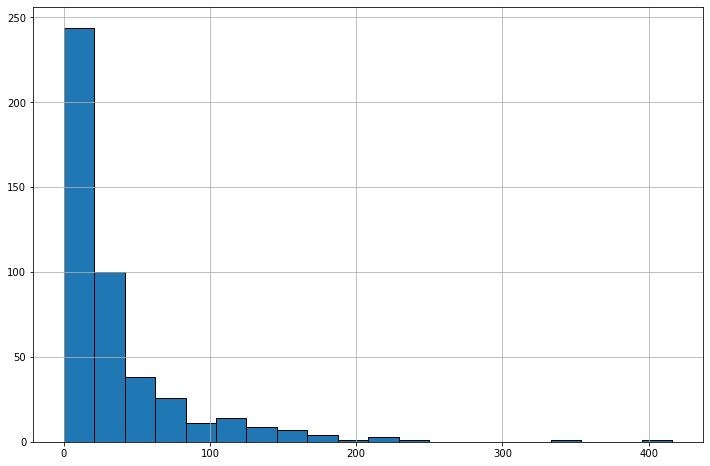

In [22]:
average_deaths = NC_total['New_deaths_per_day'].mean()
print('Mean of new deaths per day in NC',average_cases)
variance = NC_total['New_deaths_per_day'].var()
print('Variance of new deaths per day in NC',variance)
Skewness = stats.skew(NC_total['New_deaths_per_day'])
print('Skewness of new deaths per day in NC',Skewness)
Kurtosis = stats.kurtosis(NC_total['New_deaths_per_day'])
print('Kurtosis of new deaths per day in NC',Kurtosis)

NC_total.New_deaths_per_day.hist(bins=20, ec='black', figsize=(12,8))

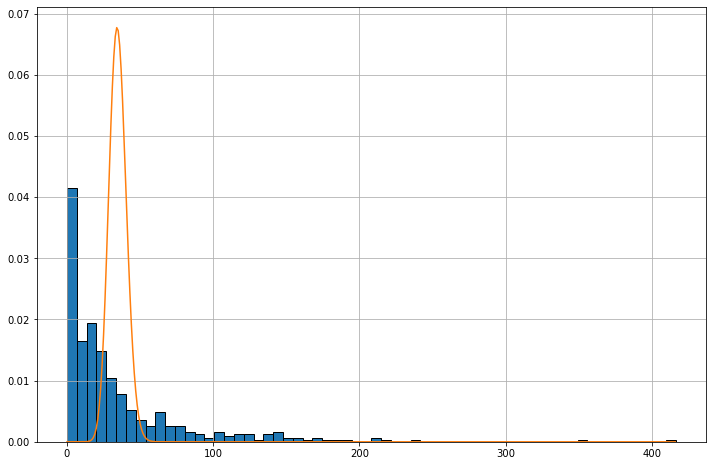

In [23]:
max_deaths = NC_total['New_deaths_per_day'].max()
min_deaths = NC_total['New_deaths_per_day'].min()
new_list =[] 
for i in range(int(min_deaths), int(max_deaths+1)):
        y =poisson.pmf(k=i, mu=average_deaths)
        new_list.append(y)
NC_poiss = np.array(new_list)
NC_x_axis = np.arange(min_deaths, max_deaths)


NC_total.New_deaths_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(NC_x_axis, NC_poiss)

### 4. Ohio

Taking dataset of Ohio state and calculating new cases and new deaths per day. These values are normalized to 100000.

In [24]:
Ohio_df = superset_long[superset_long['StateFIPS'] == 39]
Ohio_df['New_cases_per_day'] = round((Ohio_df.groupby('countyFIPS').Cases.diff()/Ohio_df['population'])*100000,2)
Ohio_df['New_deaths_per_day'] = round((Ohio_df.groupby('countyFIPS').Deaths.diff()/Ohio_df['population'])*100000,2)
Ohio_df = Ohio_df.dropna()
Ohio_df[Ohio_df['New_cases_per_day']<0]=0
Ohio_df[Ohio_df['New_deaths_per_day']<0]=0
Ohio_df = Ohio_df[Ohio_df['New_cases_per_day'] != 0]
Ohio_df['Date'] = pn.to_datetime(Ohio_df['Date'])
Ohio_total = Ohio_df.groupby('Date').sum().reset_index()
Ohio_df

<ipython-input-24-30fa2515d989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ohio_df['New_cases_per_day'] = round((Ohio_df.groupby('countyFIPS').Cases.diff()/Ohio_df['population'])*100000,2)
<ipython-input-24-30fa2515d989>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ohio_df['New_deaths_per_day'] = round((Ohio_df.groupby('countyFIPS').Deaths.diff()/Ohio_df['population'])*100000,2)


,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
149734,39035,OH,Cuyahoga County,39,1235072,2020-03-09,0,3,0.24,0.0
156076,39151,OH,Stark County,39,370606,2020-03-11,0,1,0.27,0.0
159220,39155,OH,Trumbull County,39,197974,2020-03-12,0,1,0.51,0.0
162291,39013,OH,Belmont County,39,67006,2020-03-13,0,2,2.98,0.0
162293,39017,OH,Butler County,39,383134,2020-03-13,0,1,0.26,0.0
...,...,...,...,...,...,...,...,...,...,...
1799350,39167,OH,Washington County,39,59911,2021-08-16,111,5524,36.72,0.0
1799351,39169,OH,Wayne County,39,115710,2021-08-16,229,9644,43.21,0.0
1799352,39171,OH,Williams County,39,36692,2021-08-16,79,3724,49.06,0.0
1799353,39173,OH,Wood County,39,130817,2021-08-16,202,13624,22.93,0.0


Statistical values of Ohio states for new cases per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new cases per day in Ohio 1762.924661190965
Variance of new cases per day in Ohio 7655932.192554973
Skewness of new cases per day in Ohio 4.955217575313089
Kurtosis of new cases per day in Ohio 40.0452376706714


<AxesSubplot:>

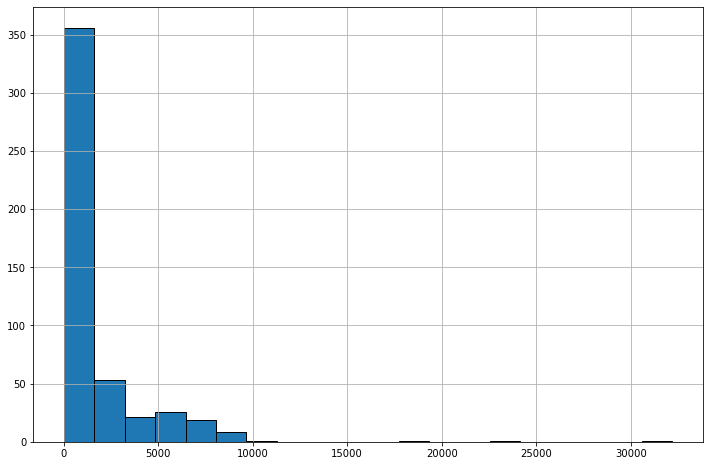

In [25]:
average_cases = Ohio_total['New_cases_per_day'].mean()
print('Mean of new cases per day in Ohio',average_cases)
variance = Ohio_total['New_cases_per_day'].var()
print('Variance of new cases per day in Ohio',variance)
Skewness = stats.skew(Ohio_total['New_cases_per_day'])
print('Skewness of new cases per day in Ohio',Skewness)
Kurtosis = stats.kurtosis(Ohio_total['New_cases_per_day'])
print('Kurtosis of new cases per day in Ohio',Kurtosis)

Ohio_total.New_cases_per_day.hist(bins=20, ec='black', figsize=(12,8))

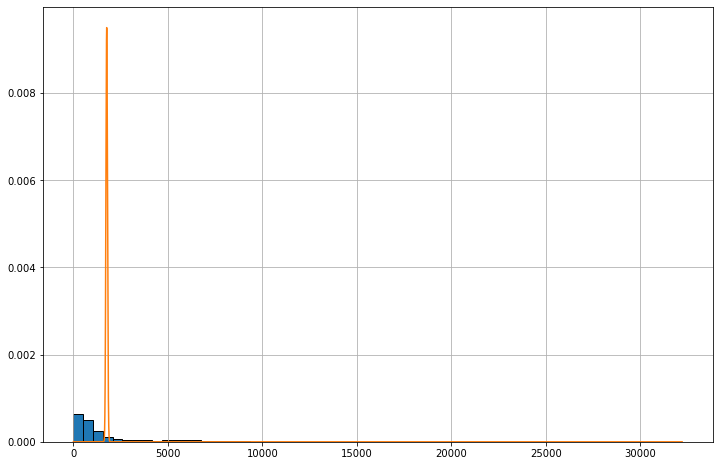

In [26]:
max_cases = Ohio_total['New_cases_per_day'].max()
min_cases = Ohio_total['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_cases, max_cases)


Ohio_total.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

Statistical values of Ohio states for new deaths per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new deaths per day in Ohio 1762.924661190965
Variance of new deaths per day in Ohio 9600.478379629149
Skewness of new deaths per day in Ohio 12.747725326389231
Kurtosis of new deaths per day in Ohio 204.7719967415816


<AxesSubplot:>

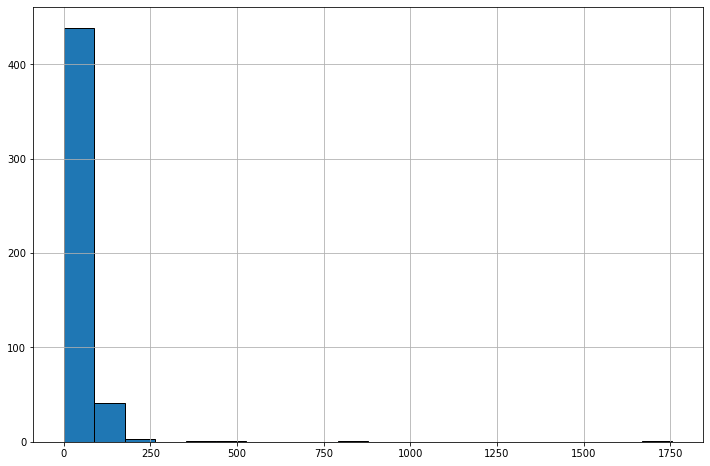

In [27]:
average_deaths = Ohio_total['New_deaths_per_day'].mean()
print('Mean of new deaths per day in Ohio',average_cases)
variance = Ohio_total['New_deaths_per_day'].var()
print('Variance of new deaths per day in Ohio',variance)
Skewness = stats.skew(Ohio_total['New_deaths_per_day'])
print('Skewness of new deaths per day in Ohio',Skewness)
Kurtosis = stats.kurtosis(Ohio_total['New_deaths_per_day'])
print('Kurtosis of new deaths per day in Ohio',Kurtosis)

Ohio_total.New_deaths_per_day.hist(bins=20, ec='black', figsize=(12,8))

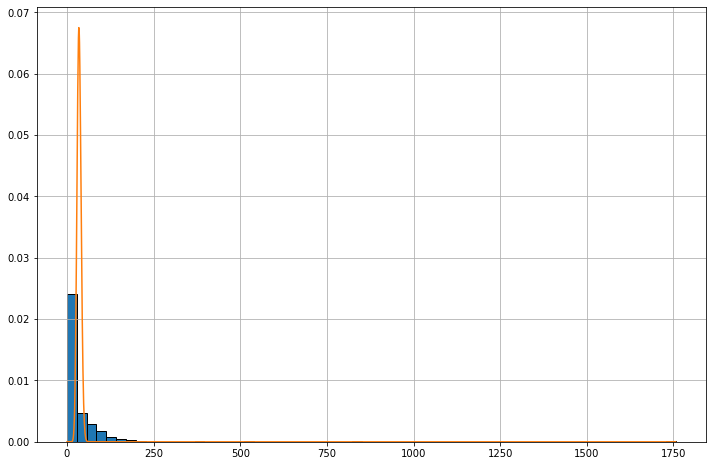

In [28]:
max_deaths = Ohio_total['New_deaths_per_day'].max()
min_deaths = Ohio_total['New_deaths_per_day'].min()
new_list =[] 
for i in range(int(min_deaths), int(max_deaths+1)):
        y =poisson.pmf(k=i, mu=average_deaths)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_deaths, max_deaths)


Ohio_total.New_deaths_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

### 5. New York

Taking dataset of New York state and calculating new cases and new deaths per day. These values are normalized to 100000.

In [29]:
NY_df = superset_long[superset_long['StateFIPS'] == 36]
NY_df['New_cases_per_day'] = round((NY_df.groupby('countyFIPS').Cases.diff()/NY_df['population'])*100000,2)
NY_df['New_deaths_per_day'] = round((NY_df.groupby('countyFIPS').Deaths.diff()/NY_df['population'])*100000,2)
NY_df = NY_df.dropna()
NY_df[NY_df['New_cases_per_day']<0]=0
NY_df[NY_df['New_deaths_per_day']<0]=0
NY_df = NY_df[NY_df['New_cases_per_day'] != 0]
NY_df['Date'] = pn.to_datetime(NY_df['Date'])
NY_total = NY_df.groupby('Date').sum().reset_index()
NY_df

<ipython-input-29-1918c0837b73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_df['New_cases_per_day'] = round((NY_df.groupby('countyFIPS').Cases.diff()/NY_df['population'])*100000,2)
<ipython-input-29-1918c0837b73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_df['New_deaths_per_day'] = round((NY_df.groupby('countyFIPS').Deaths.diff()/NY_df['population'])*100000,2)


,countyFIPS,State,County Name,StateFIPS,population,Date,Deaths,Cases,New_cases_per_day,New_deaths_per_day
127538,36061,NY,New York County,36,1628706,2020-03-02,0,1,0.06,0.0
130709,36119,NY,Westchester County,36,967506,2020-03-03,0,1,0.10,0.0
133851,36119,NY,Westchester County,36,967506,2020-03-04,0,10,0.93,0.0
136957,36047,NY,Kings County,36,2559903,2020-03-05,0,1,0.04,0.0
136963,36059,NY,Nassau County,36,1356924,2020-03-05,0,1,0.07,0.0
...,...,...,...,...,...,...,...,...,...,...
1799109,36115,NY,Washington County,36,61204,2021-08-16,56,3317,8.17,0.0
1799110,36117,NY,Wayne County,36,89918,2021-08-16,73,6042,21.13,0.0
1799111,36119,NY,Westchester County,36,967506,2021-08-16,2301,134167,15.09,0.1
1799112,36121,NY,Wyoming County,36,39859,2021-08-16,53,3652,2.51,0.0


Statistical values of New York states for new cases per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new cases per day in NY 1017.7955407969635
Variance of new cases per day in NY 1455335.179979507
Skewness of new cases per day in NY 1.8315475727516641
Kurtosis of new cases per day in NY 3.2378679767181104


<AxesSubplot:>

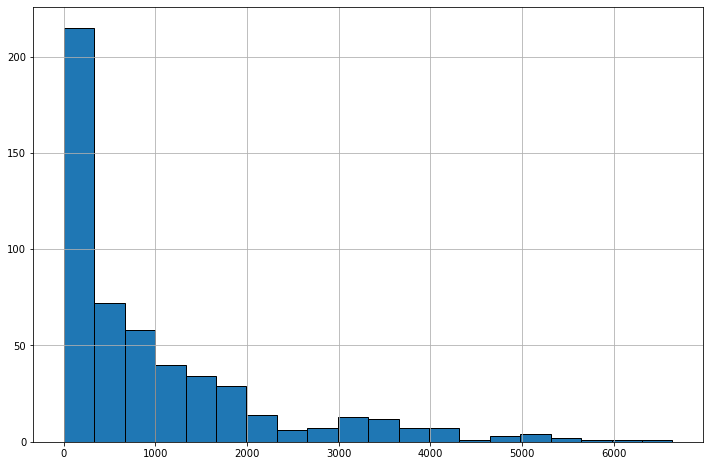

In [30]:
average_cases = NY_total['New_cases_per_day'].mean()
print('Mean of new cases per day in NY',average_cases)
variance = NY_total['New_cases_per_day'].var()
print('Variance of new cases per day in NY',variance)
Skewness = stats.skew(NY_total['New_cases_per_day'])
print('Skewness of new cases per day in NY',Skewness)
Kurtosis = stats.kurtosis(NY_total['New_cases_per_day'])
print('Kurtosis of new cases per day in NY',Kurtosis)

NY_total.New_cases_per_day.hist(bins=20, ec='black', figsize=(12,8))

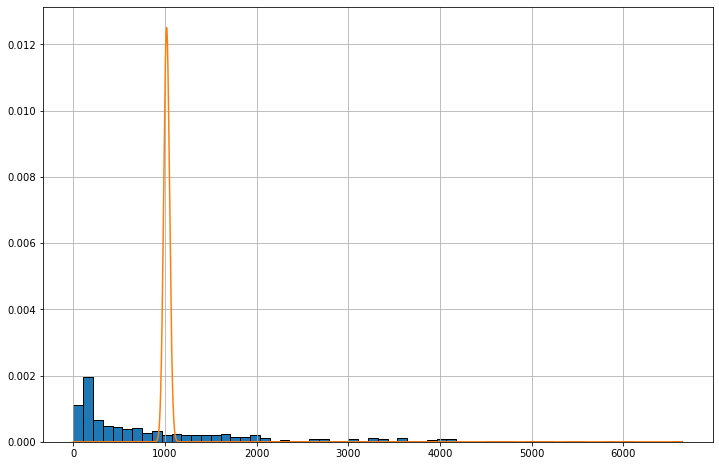

In [31]:
max_cases = NY_total['New_cases_per_day'].max()
min_cases = NY_total['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_cases, max_cases)


NY_total.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

Statistical values of New York states for new cases per day. The histogram plot shows that the data is skewed to the left with long tail to the right.

Mean of new deaths per day in NY 1017.7955407969635
Variance of new deaths per day in NY 1031.8050078368856
Skewness of new deaths per day in NY 5.091982560264268
Kurtosis of new deaths per day in NY 42.10967985512625


<AxesSubplot:>

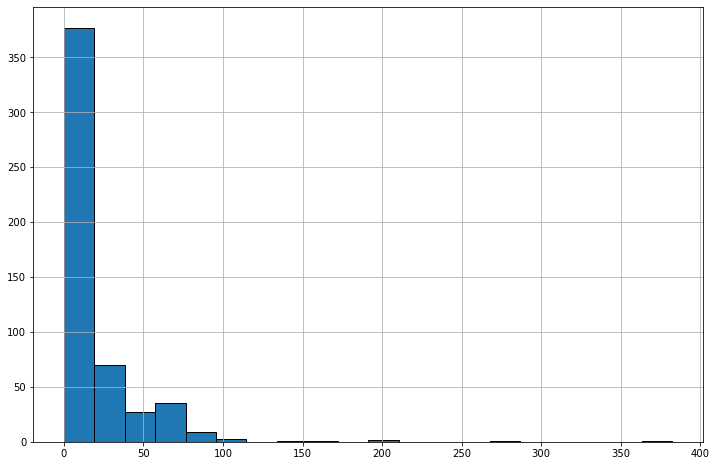

In [32]:
average_deaths = NY_total['New_deaths_per_day'].mean()
print('Mean of new deaths per day in NY',average_cases)
variance = NY_total['New_deaths_per_day'].var()
print('Variance of new deaths per day in NY',variance)
Skewness = stats.skew(NY_total['New_deaths_per_day'])
print('Skewness of new deaths per day in NY',Skewness)
Kurtosis = stats.kurtosis(NY_total['New_deaths_per_day'])
print('Kurtosis of new deaths per day in NY',Kurtosis)

NY_total.New_deaths_per_day.hist(bins=20, ec='black', figsize=(12,8))

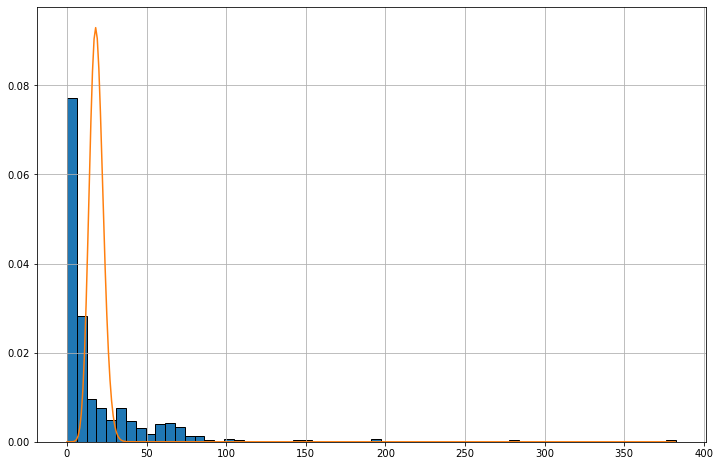

In [33]:
max_deaths = NY_total['New_deaths_per_day'].max()
min_deaths = NY_total['New_deaths_per_day'].min()
new_list =[] 
for i in range(int(min_deaths), int(max_deaths+1)):
        y =poisson.pmf(k=i, mu=average_deaths)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_deaths, max_deaths)


NY_total.New_deaths_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

### North Carolina County wise data

Number of cases per day for every county in NC.

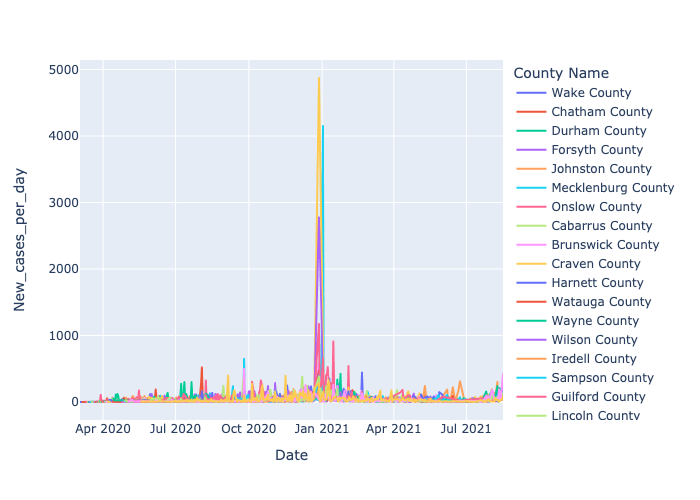

In [34]:
NC_county_cases_plot = px.line(NC_df, x ='Date', y='New_cases_per_day', color='County Name')
NC_county_cases_plot.show("png")

Number of deaths for each county in NC

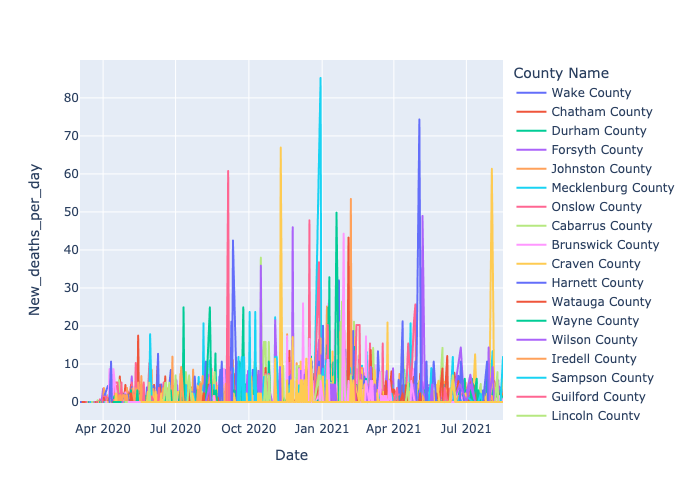

In [35]:
NC_county_deaths_plot = px.line(NC_df, x ='Date', y='New_deaths_per_day', color='County Name')
NC_county_deaths_plot.show("png")

#### Finding NC's heighest populated county and least populated county.

In [36]:
NC_Df_max_county = NC_df[NC_df['population'] == NC_df['population'].max()]
NC_Df_min_county = NC_df[NC_df['population'] == NC_df['population'].min()]

Removing annomalies from the heighest populated county's dataset.

In [37]:
NC_Df_max_county = NC_Df_max_county.dropna()
NC_Df_max_county[NC_Df_max_county['New_cases_per_day']<0]=0
NC_Df_max_county[NC_Df_max_county['New_deaths_per_day']<0]=0
NC_Df_max_county = NC_Df_max_county[NC_Df_max_county['New_cases_per_day'] != 0]
NC_Df_max_county = NC_Df_max_county.groupby('Date').sum().reset_index()

#### Poisson distribution for number of new cases per day of North Carolina's heighest populated County.

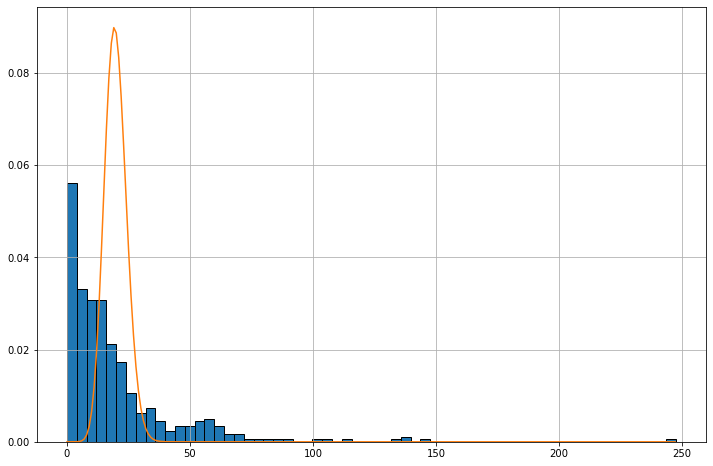

In [38]:
average_cases = NC_Df_max_county['New_cases_per_day'].mean()
max_cases = NC_Df_max_county['New_cases_per_day'].max()
min_cases = NC_Df_max_county['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases+1)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_cases, max_cases)


NC_Df_max_county.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

#### Poisson distribution for number of new deaths per day of North Carolina's heighest populated County.

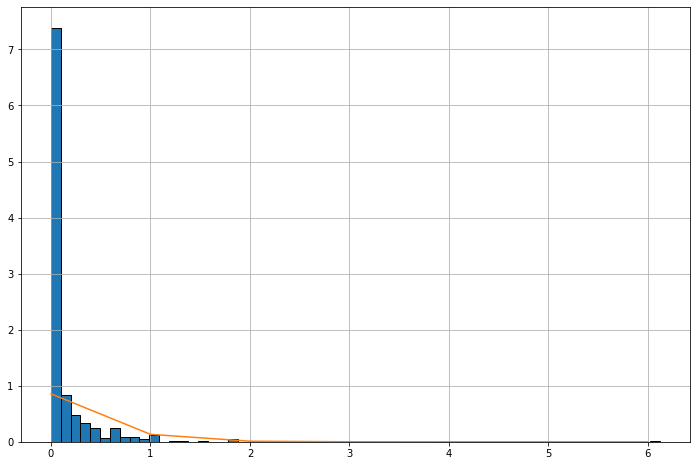

In [39]:
average_deaths = NC_Df_max_county['New_deaths_per_day'].mean()
max_deaths = NC_Df_max_county['New_deaths_per_day'].max()
min_deaths = NC_Df_max_county['New_deaths_per_day'].min()
new_list =[] 
for i in range(int(min_deaths), int(max_deaths+1)):
        y =poisson.pmf(k=i, mu=average_deaths)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_deaths, max_deaths)


NC_Df_max_county.New_deaths_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

Removing annomalies from the least populated county's dataset.

In [40]:
NC_Df_min_county = NC_Df_min_county.dropna()
NC_Df_min_county[NC_Df_min_county['New_cases_per_day']<0]=0
NC_Df_min_county[NC_Df_min_county['New_deaths_per_day']<0]=0
NC_Df_min_county = NC_Df_min_county[NC_Df_min_county['New_cases_per_day'] != 0]
NC_Df_min_county = NC_Df_min_county.groupby('Date').sum().reset_index()

#### Poisson distribution for number of new cases per day of North Carolina's least populated County.

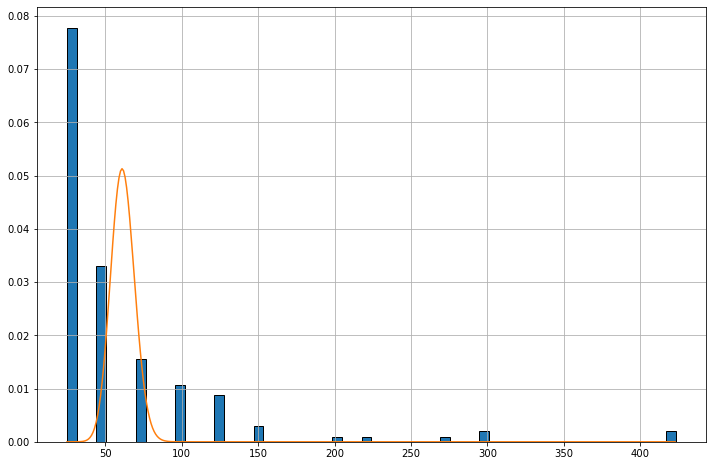

In [41]:
average_cases = NC_Df_min_county['New_cases_per_day'].mean()
max_cases = NC_Df_min_county['New_cases_per_day'].max()
min_cases = NC_Df_min_county['New_cases_per_day'].min()
new_list =[] 
for i in range(int(min_cases), int(max_cases)):
        y =poisson.pmf(k=i, mu=average_cases)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_cases, max_cases)


NC_Df_min_county.New_cases_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

#### Poisson distribution for number of new deaths per day of North Carolina's least populated County.

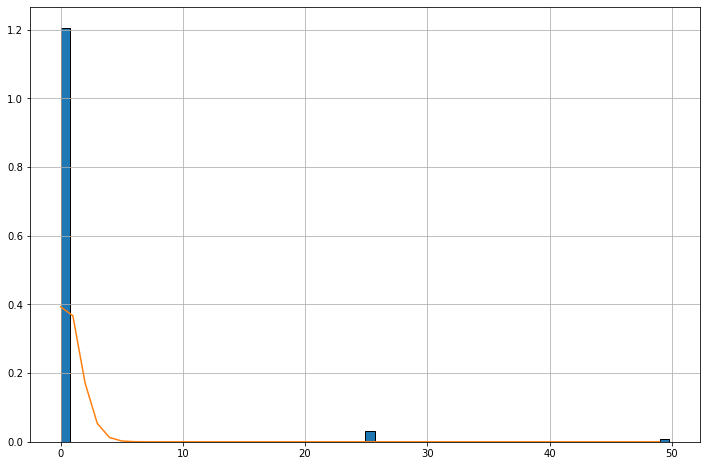

In [42]:
average_deaths = NC_Df_min_county['New_deaths_per_day'].mean()
max_deaths = NC_Df_min_county['New_deaths_per_day'].max()
min_deaths = NC_Df_min_county['New_deaths_per_day'].min()
new_list =[] 
for i in range(int(min_deaths), int(max_deaths+1)):
        y =poisson.pmf(k=i, mu=average_deaths)
        new_list.append(y)
poiss = np.array(new_list)
x_axis = np.arange(min_deaths, max_deaths)


NC_Df_min_county.New_deaths_per_day.hist(density=True, bins=62, ec='black', figsize=(12,8))
#label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom, beta_mom)
plt.plot(x_axis, poiss)

### Employment DataSet

Reading employment dataset from Stage-1.

In [43]:
Emp_data = pn.read_csv("../../../../data/stage_1/Compressed_Employment_Data_Annual_2020.csv")
Emp_data

,countyFIPS,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
0,1001,5,1021,73,0,2020,1,NaN,191,2137,...,38,1.8,2462818,11.2,924986,8.5,2890,3.0,76,9.4
1,1003,5,1021,73,0,2020,1,NaN,1505,17615,...,41,0.2,5910128,3.8,3149713,3.2,-29954,-3.1,18,2.6
2,1005,5,1021,73,0,2020,1,NaN,139,1383,...,-67,-4.7,-689462,-4.8,-358317,-4.4,-3641,-4.8,-2,-0.3
3,1007,5,1021,73,0,2020,1,NaN,89,937,...,179,22.8,1901579,27.3,1368184,30.3,34911,78.3,29,4.2
4,1009,5,1021,73,0,2020,1,NaN,189,1614,...,-56,-3.4,-354516,-2.3,-353330,-3.6,-7910,-10.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,56037,5,1021,73,0,2020,1,NaN,351,4234,...,-176,-4.1,-2096212,-3.9,-1508021,-3.1,-218430,-43.9,-6,-0.6
3135,56039,5,1021,73,0,2020,1,NaN,337,2564,...,-302,-11.1,1305469,4.7,517130,2.0,-23168,-13.6,117,15.1
3136,56041,5,1021,73,0,2020,1,NaN,163,1698,...,-20,-1.2,554202,3.2,354692,2.2,-73496,-48.8,38,4.9
3137,56043,5,1021,73,0,2020,1,NaN,86,589,...,-43,-6.8,684953,9.1,-112154,-1.8,6752,13.5,154,16.8


In [44]:
Emp_covid_long = pn.merge(Emp_data,superset_long, on = 'countyFIPS')
Emp_covid_long

,countyFIPS,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,...,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg,State,County Name,StateFIPS,population,Date,Deaths,Cases
0,1001,5,1021,73,0,2020,1,NaN,191,2137,...,3.0,76,9.4,AL,Autauga County,1,55869,1/22/2020,0,0
1,1001,5,1021,73,0,2020,1,NaN,191,2137,...,3.0,76,9.4,AL,Autauga County,1,55869,1/23/2020,0,0
2,1001,5,1021,73,0,2020,1,NaN,191,2137,...,3.0,76,9.4,AL,Autauga County,1,55869,1/24/2020,0,0
3,1001,5,1021,73,0,2020,1,NaN,191,2137,...,3.0,76,9.4,AL,Autauga County,1,55869,1/25/2020,0,0
4,1001,5,1021,73,0,2020,1,NaN,191,2137,...,3.0,76,9.4,AL,Autauga County,1,55869,1/26/2020,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798642,56045,5,1021,73,0,2020,1,NaN,60,415,...,-21.4,29,4.9,WY,Weston County,56,6927,8/12/2021,6,700
1798643,56045,5,1021,73,0,2020,1,NaN,60,415,...,-21.4,29,4.9,WY,Weston County,56,6927,8/13/2021,6,700
1798644,56045,5,1021,73,0,2020,1,NaN,60,415,...,-21.4,29,4.9,WY,Weston County,56,6927,8/14/2021,6,705
1798645,56045,5,1021,73,0,2020,1,NaN,60,415,...,-21.4,29,4.9,WY,Weston County,56,6927,8/15/2021,6,705


#### Finding correlation of the mearged dataframe.

In [45]:
emp_covid_corr = Emp_covid_long.corr()
emp_covid_corr

,countyFIPS,own_code,industry_code,agglvl_code,size_code,year,qtr,qtrly_estabs,month1_emplvl,month2_emplvl,...,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg,StateFIPS,population,Deaths,Cases
countyFIPS,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.054253,-0.045167,-0.045274,...,0.023482,0.083241,-0.110903,-0.096685,-0.018031,-0.024281,0.999975,-0.055840,-0.038393,-0.041354
own_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industry_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agglvl_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qtr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qtrly_estabs,-0.054253,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.982333,0.982234,...,0.415555,0.017318,-0.036392,0.004712,0.015449,-0.012855,-0.053957,0.977934,0.717132,0.717769
month1_emplvl,-0.045167,NaN,NaN,NaN,NaN,NaN,NaN,0.982333,1.000000,0.999990,...,0.468249,0.022507,-0.075646,0.005550,0.014231,-0.014187,-0.044913,0.975495,0.684309,0.707873
month2_emplvl,-0.045274,NaN,NaN,NaN,NaN,NaN,NaN,0.982234,0.999990,1.000000,...,0.468902,0.022546,-0.075885,0.005496,0.014184,-0.014200,-0.045022,0.975473,0.683917,0.707910


##### From the above correlation it is found that the Quarterly establishments, Quarterly emplement, Quarterly wages, quarterly taxable wages and quarterly contributions are highly correlated to number of cases and deaths. Whereas third month employment change and weekly wages are leastly imacted by the number of covid cases and deaths.